In [1]:
import pandas as pd
import os
import openpyxl
import matplotlib.pyplot as plt

In [2]:
file_path2 = "2023-33/education.xlsx"
# Postpandemic workbook
post_pandemic_data = openpyxl.load_workbook(file_path2)

In [3]:
table_5_1 = post_pandemic_data["Table 5.1"]
table_5_2 = post_pandemic_data["Table 5.2"]
table_5_3 = post_pandemic_data["Table 5.3"]
table_5_4 = post_pandemic_data["Table 5.4"]

In [4]:
# The code provided defines two functions:
# # # Function to get and display column names
# # def get_column_names(df):
# #     print("Column Names:")
# #     column_names = df.columns.tolist()
# #     print(column_names)
# #     return column_names

# # # Function to get and display rows of a specific column
# # def get_specific_column_rows(df, column_name, num_rows=5):
# #     if column_name not in df.columns:
# #         print(f"Error: Column '{column_name}' not found in the DataFrame.")
# #         return
# #     print(f"\nRows for Column '{column_name}':")
# #     print(df[column_name].head(num_rows))


In [5]:
# def preprocess_table_and_title(df):
#     # Extract the title from the first row
#     table_title = df.iloc[0,0]  # Assuming the title is in the first cell
#     print(f"Table Title: {table_title}")
    
#     # Set the second row as column headers
#     df.columns = df.iloc[1]  # Use the second row as column headers
#     df = df[2:].reset_index(drop=True)  # Drop the first two rows
#     return table_title, df

# # Preprocess the tables (if necessary)
# table_5_1 = preprocess_table_and_title(table_5_1)

In [6]:
def processTable(sheet):
    # Output the title from the first row (index 0)
    table_title = sheet[1][0].value  # First row, first column is the title
    print(f"Table Title: {table_title}")
    
    # Output the column names from the second row (index 1)
    column_names = [cell.value for cell in sheet[2]]  # Second row for column names
    print("Column Names:")
    print(column_names)
    
    # Output the data starting from the third row (index 2)
    print("\nRow Data:")
    for row in sheet.iter_rows(min_row=3, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        print(row_values)

# Process Table 5.1
processTable(table_5_1)

Table Title: Table 5.1 Unemployment rates and earnings by educational attainment, 2023
Column Names:
['Educational attainment', 'Median usual weekly earnings ($)', 'Unemployment rate (%)']

Row Data:
['Doctoral degree', 2109, 1.6]
['Professional degree', 2206, 1.2]
["Master's degree", 1737, 2]
["Bachelor's degree", 1493, 2.2]
["Associate's degree", 1058, 2.7]
['Some college, no degree', 992, 3.3]
['High school diploma', 899, 3.9]
['Less than a high school diploma', 708, 5.6]
['Total', 1170, 3]
['Note: Data are for persons age 25 and over. Earnings are for full-time wage and salary workers.', None, None]
['Source: Current Population Survey, U.S. Department of Labor, U.S. Bureau of Labor Statistics', None, None]


In [7]:
processTable(table_5_1)
print("\n")

Table Title: Table 5.1 Unemployment rates and earnings by educational attainment, 2023
Column Names:
['Educational attainment', 'Median usual weekly earnings ($)', 'Unemployment rate (%)']

Row Data:
['Doctoral degree', 2109, 1.6]
['Professional degree', 2206, 1.2]
["Master's degree", 1737, 2]
["Bachelor's degree", 1493, 2.2]
["Associate's degree", 1058, 2.7]
['Some college, no degree', 992, 3.3]
['High school diploma', 899, 3.9]
['Less than a high school diploma', 708, 5.6]
['Total', 1170, 3]
['Note: Data are for persons age 25 and over. Earnings are for full-time wage and salary workers.', None, None]
['Source: Current Population Survey, U.S. Department of Labor, U.S. Bureau of Labor Statistics', None, None]




In [8]:
# Function to process and extract relevant rows
def extract_employment_data(sheet):
    data = []
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Skip metadata rows
        if (
            not row_values[0] or  # Skip rows with no label
            row_values[0].startswith("Table") or  # Skip title row
            #row_values[0] == "Educational attainment" or  # Skip header row
            row_values[0].startswith("Note:") or  # Skip notes
            row_values[0].startswith("Source:")  # Skip source
        ):
            continue
        # Ensure all data rows have meaningful values
        if row_values[1] is not None:
            data.append(row_values)
    return data

# Extract relevant data
processed_data = extract_employment_data(table_5_1)

# Remove "Total, all occupations"
filtered_data = [row for row in processed_data if row[0] != "Total"]

In [9]:
filtered_data

[['Educational attainment',
  'Median usual weekly earnings ($)',
  'Unemployment rate (%)'],
 ['Doctoral degree', 2109, 1.6],
 ['Professional degree', 2206, 1.2],
 ["Master's degree", 1737, 2],
 ["Bachelor's degree", 1493, 2.2],
 ["Associate's degree", 1058, 2.7],
 ['Some college, no degree', 992, 3.3],
 ['High school diploma', 899, 3.9],
 ['Less than a high school diploma', 708, 5.6]]

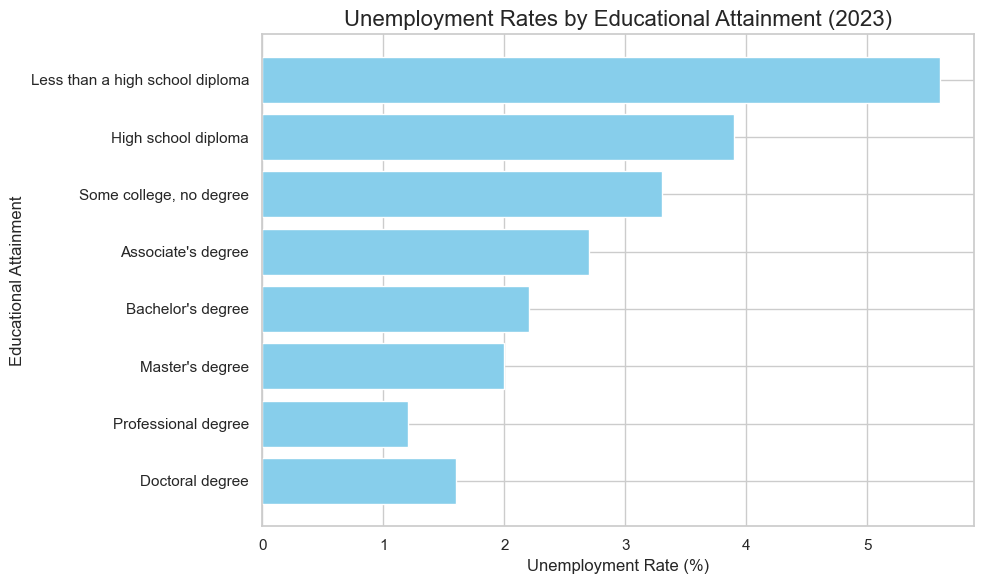

In [10]:
import seaborn as sns

columns = filtered_data[0]  # The first row contains column names
data = filtered_data[1:]    # The remaining rows are the actual data

df_table_5_1 = pd.DataFrame(data, columns=columns)

sns.set(style="whitegrid")

education = df_table_5_1['Educational attainment']
unemployment_rate = df_table_5_1['Unemployment rate (%)']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, unemployment_rate, color='skyblue')

# Add title and labels
plt.title("Unemployment Rates by Educational Attainment (2023)", fontsize=16)
plt.xlabel("Unemployment Rate (%)", fontsize=12)
plt.ylabel("Educational Attainment", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


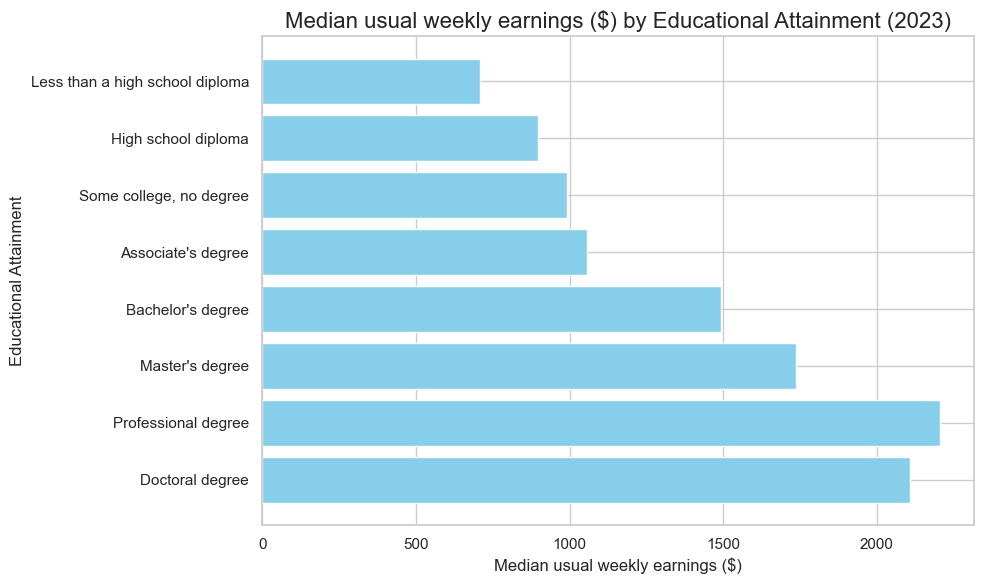

In [11]:
df_table_5_1 = pd.DataFrame(data, columns=columns)

sns.set(style="whitegrid")

education = df_table_5_1['Educational attainment']
unemployment_rate = df_table_5_1['Median usual weekly earnings ($)']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, unemployment_rate, color='skyblue')

# Add title and labels
plt.title("Median usual weekly earnings ($) by Educational Attainment (2023)", fontsize=16)
plt.xlabel("Median usual weekly earnings ($)", fontsize=12)
plt.ylabel("Educational Attainment", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
processTable(table_5_2)

Table Title: Table 5.2 Employment, wages, and projected change in employment by typical entry-level education (Employment in thousands)
Column Names:
['Typical entry-level education', 'Employment, 2023', 'Employment, 2033', 'Employment distribution, percent, 2023', 'Employment distribution, percent, 2033', 'Numeric employment change, 2023-33', 'Percent employment change, 2023-33', 'Median annual wage, dollars, 2023[1]']

Row Data:
['Total, all occupations', 167849.8, 174589, 100, 100, 6739.2, 4, 48060]
['  Doctoral or professional degree', 4486.5, 4804.6, 2.7, 2.8, 318.1, 7.1, 124550]
["  Master's degree", 3668.6, 4111, 2.2, 2.4, 442.4, 12.1, 79840]
["  Bachelor's degree", 41431.7, 44410, 24.7, 25.4, 2978.3, 7.2, 86460]
["  Associate's degree", 3438.3, 3653.7, 2, 2.1, 215.4, 6.3, 62180]
['  Postsecondary nondegree award', 10383.2, 11003.2, 6.2, 6.3, 620, 6, 47740]
['  Some college, no degree', 4241.4, 4170.5, 2.5, 2.4, -70.9, -1.7, 44130]
['  High school diploma or equivalent', 63066.5

In [15]:
def extract_table5_2_data(sheet):
    data = []
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Skip metadata rows
        if (
            not row_values[0] or  # Skip rows with no label
            row_values[0].startswith("Table") or  # Skip title row
            row_values[0] in ("Footnotes:", "[1]") or  # Skip footnote rows
            row_values[0].startswith("Note:") or  # Skip notes
            row_values[0].startswith("Source:")  # Skip source
        ):
            continue
        # Ensure all data rows have meaningful values
        if row_values[1] is not None:
            data.append(row_values)
    return data

# Extract relevant data
processed_data2 = extract_table5_2_data(table_5_2)

# Remove "Total, all occupations"
filtered_data2 = [row for row in processed_data2 if row[0] != "Total, all occupations"]

In [16]:
filtered_data2

[['Typical entry-level education',
  'Employment, 2023',
  'Employment, 2033',
  'Employment distribution, percent, 2023',
  'Employment distribution, percent, 2033',
  'Numeric employment change, 2023-33',
  'Percent employment change, 2023-33',
  'Median annual wage, dollars, 2023[1]'],
 ['  Doctoral or professional degree',
  4486.5,
  4804.6,
  2.7,
  2.8,
  318.1,
  7.1,
  124550],
 ["  Master's degree", 3668.6, 4111, 2.2, 2.4, 442.4, 12.1, 79840],
 ["  Bachelor's degree", 41431.7, 44410, 24.7, 25.4, 2978.3, 7.2, 86460],
 ["  Associate's degree", 3438.3, 3653.7, 2, 2.1, 215.4, 6.3, 62180],
 ['  Postsecondary nondegree award',
  10383.2,
  11003.2,
  6.2,
  6.3,
  620,
  6,
  47740],
 ['  Some college, no degree', 4241.4, 4170.5, 2.5, 2.4, -70.9, -1.7, 44130],
 ['  High school diploma or equivalent',
  63066.5,
  64648.7,
  37.6,
  37,
  1582.1,
  2.5,
  45040],
 ['  No formal educational credential',
  37133.6,
  37787.4,
  22.1,
  21.6,
  653.8,
  1.8,
  34430]]

In [37]:
columns2 = filtered_data2[0]  # The first row contains column names
data2 = filtered_data2[1:]    # The remaining rows are the actual data

df_table_5_2 = pd.DataFrame(data2, columns=columns2)


In [38]:
df_table_5_2

,Typical entry-level education,"Employment, 2023","Employment, 2033","Employment distribution, percent, 2023","Employment distribution, percent, 2033","Numeric employment change, 2023-33","Percent employment change, 2023-33","Median annual wage, dollars, 2023[1]"
0,Doctoral or professional degree,4486.5,4804.6,2.7,2.8,318.1,7.1,124550
1,Master's degree,3668.6,4111.0,2.2,2.4,442.4,12.1,79840
2,Bachelor's degree,41431.7,44410.0,24.7,25.4,2978.3,7.2,86460
3,Associate's degree,3438.3,3653.7,2.0,2.1,215.4,6.3,62180
4,Postsecondary nondegree award,10383.2,11003.2,6.2,6.3,620.0,6.0,47740
5,"Some college, no degree",4241.4,4170.5,2.5,2.4,-70.9,-1.7,44130
6,High school diploma or equivalent,63066.5,64648.7,37.6,37.0,1582.1,2.5,45040
7,No formal educational credential,37133.6,37787.4,22.1,21.6,653.8,1.8,34430


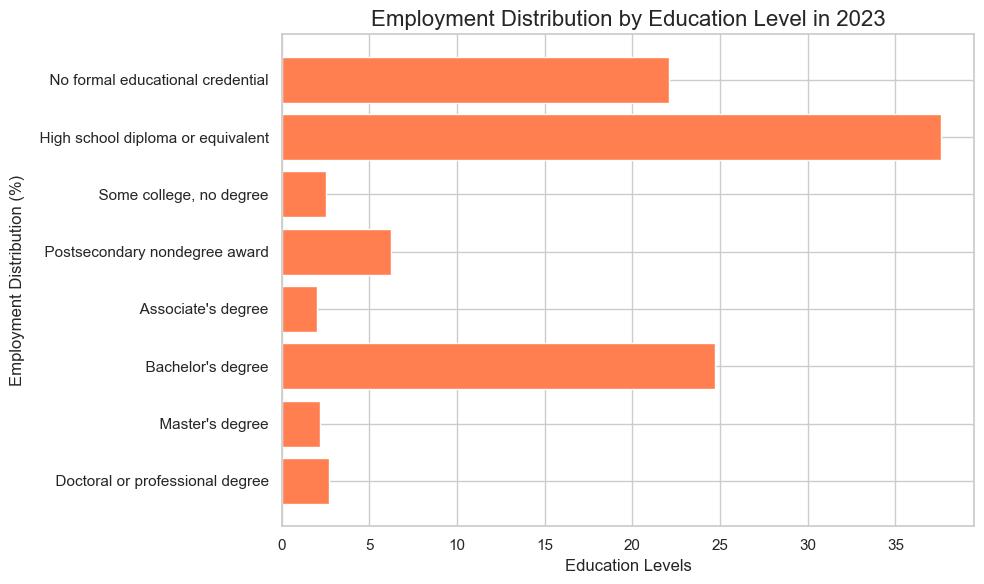

In [45]:
import seaborn as sns

sns.set(style="whitegrid")

education = df_table_5_2['Typical entry-level education']
empl_distb_2023 = df_table_5_2['Employment distribution, percent, 2023']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, empl_distb_2023, color='coral')

# Add title and labels
plt.title("Employment Distribution by Education Level in 2023", fontsize=16)
plt.xlabel("Education Levels", fontsize=12)
plt.ylabel("Employment Distribution (%)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

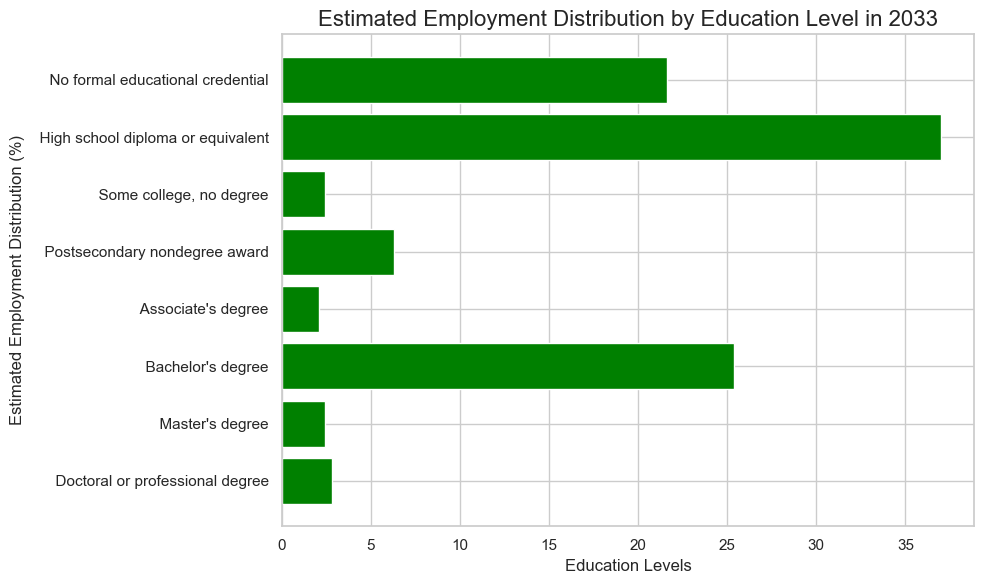

In [46]:
import seaborn as sns

sns.set(style="whitegrid")

education = df_table_5_2['Typical entry-level education']
empl_distb_2033 = df_table_5_2['Employment distribution, percent, 2033']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, empl_distb_2033, color='green')

# Add title and labels
plt.title("Estimated Employment Distribution by Education Level in 2033", fontsize=16)
plt.xlabel("Education Levels", fontsize=12)
plt.ylabel("Estimated Employment Distribution (%)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

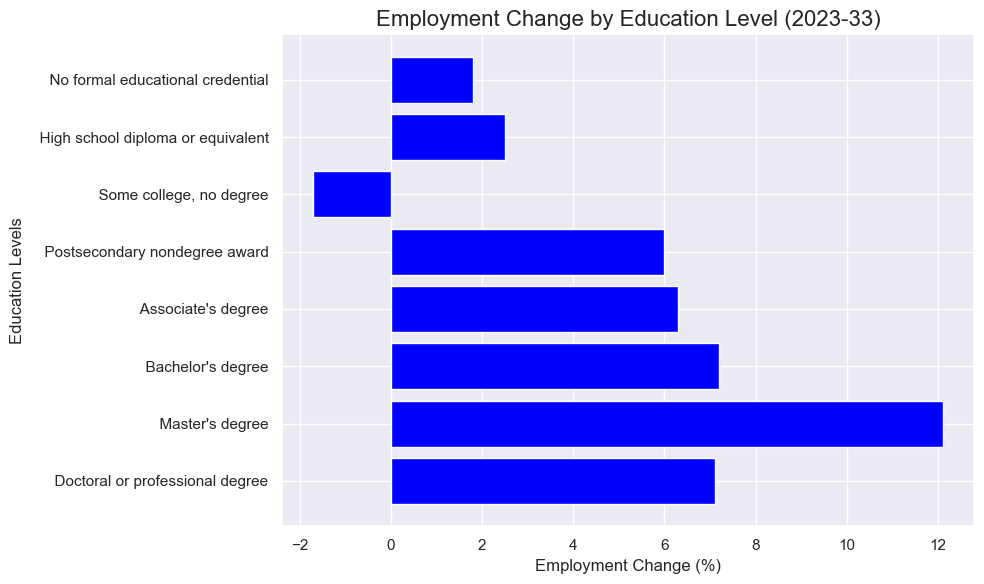

In [67]:
import seaborn as sns

sns.set(style="darkgrid")

education = df_table_5_2['Typical entry-level education']
empl_change = df_table_5_2['Percent employment change, 2023-33']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, empl_change, color='blue')

# Add title and labels
plt.title("Employment Change by Education Level (2023-33)", fontsize=16)
plt.ylabel("Education Levels", fontsize=12)
plt.xlabel("Employment Change (%)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

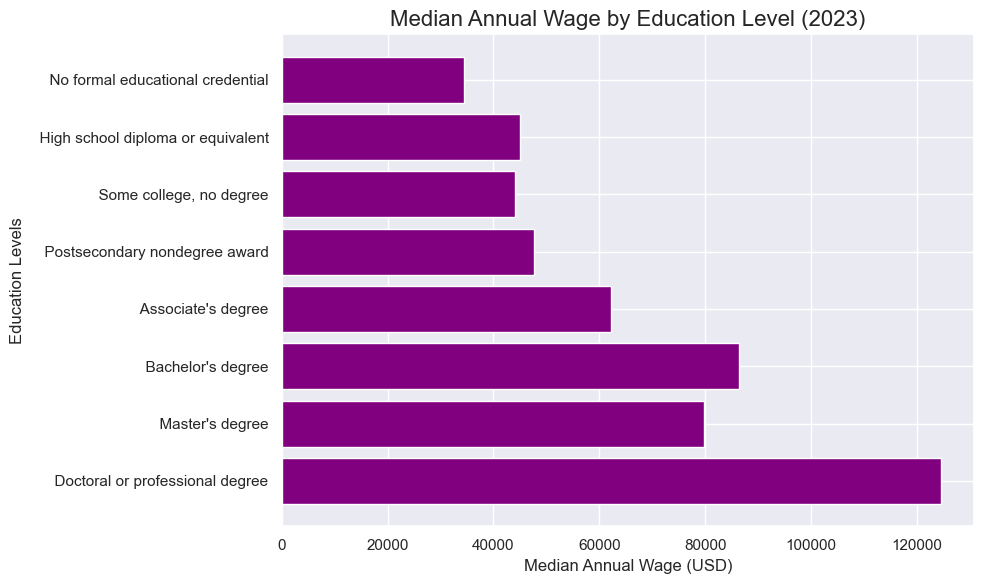

In [66]:
import seaborn as sns

sns.set(style="darkgrid")

education = df_table_5_2['Typical entry-level education']
empl_change = df_table_5_2['Median annual wage, dollars, 2023[1]']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, empl_change, color='purple')

# Add title and labels
plt.title("Median Annual Wage by Education Level (2023)", fontsize=16)
plt.ylabel("Education Levels", fontsize=12)
plt.xlabel("Median Annual Wage (USD)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [52]:
processTable(table_5_3)

Table Title: Table 5.3 Educational attainment for workers 25 years and older by detailed occupation, 2021-22
Column Names:
['2023 National Employment Matrix title', '2023 National Employment Matrix code', 'Less than high school diploma', 'High school diploma or equivalent', 'Some college, no degree', "Associate's degree", "Bachelor's degree", "Master's degree", 'Doctoral or professional degree']

Row Data:
['Total, all occupations', '00-0000', 7.4, 22.6, 18.9, 9.5, 25.1, 11.7, 4.8]
['Chief executives[1]', '11-1011', 1.6, 7.9, 13.7, 5.2, 40, 24.7, 6.9]
['General and operations managers', '11-1021', 3.2, 17.5, 23.5, 9.9, 32.7, 11.5, 1.6]
['Legislators[1]', '11-1031', 1.6, 7.9, 13.7, 5.2, 40, 24.7, 6.9]
['Advertising and promotions managers', '11-2011', 1, 4.2, 7.8, 5.2, 65.2, 15.2, 1.4]
['Marketing managers', '11-2021', 0.7, 3.7, 7.9, 4.2, 57.7, 23.8, 2.1]
['Sales managers', '11-2022', 1.5, 10.2, 18.8, 8.2, 47.5, 12.4, 1.4]
['Public relations managers[1]', '11-2032', 0.2, 3.9, 5.8, 2.8, 

In [53]:
# Function to process and extract relevant rows for a specific title
def extract_total_occupation_data(sheet):
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Look for the row with "Total, all occupations"
        if row_values[0] == "Total, all occupations":
            return row_values[2:]  # Return data starting from index 2 (excluding matrix code)

# Extracting data
total_occupation_data = extract_total_occupation_data(table_5_3)

# Education levels corresponding to the data
education_levels = [
    "Less than high school diploma",
    "High school diploma or equivalent",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Master's degree",
    "Doctoral or professional degree",
]

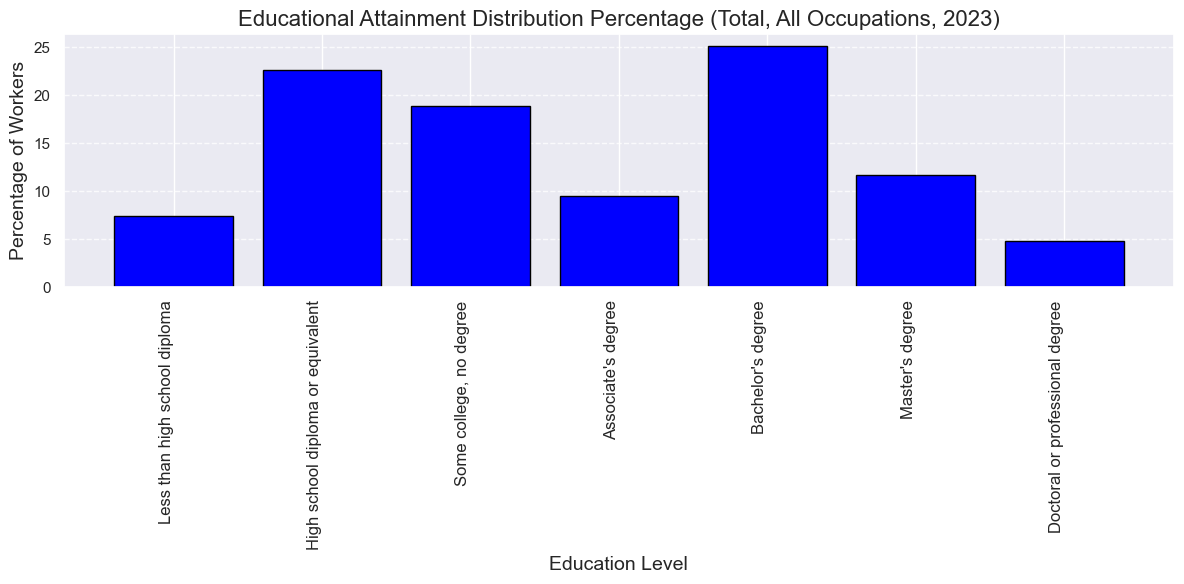

In [74]:
plt.figure(figsize=(12, 6))
plt.bar(education_levels, total_occupation_data, color='blue', edgecolor='black')
plt.title("Educational Attainment Distribution Percentage (Total, All Occupations, 2023)", fontsize=16)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Percentage of Workers", fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [56]:
processTable(table_5_4)

Table Title: Table 5.4 Education and training assignments by detailed occupation, 2023
Column Names:
['2023 National Employment Matrix title', '2023 National Employment Matrix code', 'Typical education needed for entry', 'Work experience in a related occupation', 'Typical on-the-job training needed to attain competency in the occupation', 'xlsx_ooh_link']

Row Data:
['Chief executives', '11-1011', "Bachelor's degree", '5 years or more', 'None', 'OOH Content']
['General and operations managers', '11-1021', "Bachelor's degree", '5 years or more', 'None', 'OOH Content']
['Legislators', '11-1031', "Bachelor's degree", 'Less than 5 years', 'None', '—']
['Advertising and promotions managers', '11-2011', "Bachelor's degree", 'Less than 5 years', 'None', 'OOH Content']
['Marketing managers', '11-2021', "Bachelor's degree", '5 years or more', 'None', 'OOH Content']
['Sales managers', '11-2022', "Bachelor's degree", 'Less than 5 years', 'None', 'OOH Content']
['Public relations managers', '11-20

In [60]:
def extract_table5_4_data_(sheet):
    data = []
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Skip metadata rows
        if (
            not row_values[0] or  # Skip rows with no label
            row_values[0].startswith("Table") or  # Skip title row
            row_values[0] in ("Footnotes:", "[1]") or  # Skip footnote rows
            row_values[0].startswith("Note:") or  # Skip notes
            row_values[0].startswith("Source:")  # Skip source
        ):
            continue
        # Ensure all data rows have meaningful values
        if row_values[1] is not None:
            data.append(row_values)
    return data

# Extract relevant data
data_table_5_4 = extract_table5_4_data_(table_5_4)

In [62]:
columns4 = data_table_5_4[0]  # The first row contains column names
data4 = data_table_5_4[1:]    # The remaining rows are the actual data

df_table_5_4 = pd.DataFrame(data4, columns=columns4)


In [63]:
df_table_5_4

,2023 National Employment Matrix title,2023 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,xlsx_ooh_link
0,Chief executives,11-1011,Bachelor's degree,5 years or more,None,OOH Content
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,None,OOH Content
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,None,—
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,None,OOH Content
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,None,OOH Content
...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",53-7072,High school diploma or equivalent,None,Moderate-term on-the-job training,—
828,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training,—
829,Refuse and recyclable material collectors,53-7081,No formal educational credential,None,Short-term on-the-job training,OOH Content
830,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,None,Short-term on-the-job training,—


In [84]:
df_table_5_4.drop('xlsx_ooh_link', axis=1)
df_table_5_4.drop('2023 National Employment Matrix code', axis=1)

,2023 National Employment Matrix title,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,xlsx_ooh_link
0,Chief executives,Bachelor's degree,5 years or more,None,OOH Content
1,General and operations managers,Bachelor's degree,5 years or more,None,OOH Content
2,Legislators,Bachelor's degree,Less than 5 years,None,—
3,Advertising and promotions managers,Bachelor's degree,Less than 5 years,None,OOH Content
4,Marketing managers,Bachelor's degree,5 years or more,None,OOH Content
...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",High school diploma or equivalent,None,Moderate-term on-the-job training,—
828,Wellhead pumpers,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training,—
829,Refuse and recyclable material collectors,No formal educational credential,None,Short-term on-the-job training,OOH Content
830,"Tank car, truck, and ship loaders",No formal educational credential,None,Short-term on-the-job training,—


In [78]:
education_levels = [
    "Less than high school diploma",
    "High school diploma or equivalent",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Master's degree",
    "Doctoral or professional degree",
]
education_counts = df_table_5_4['Typical education needed for entry'].value_counts()

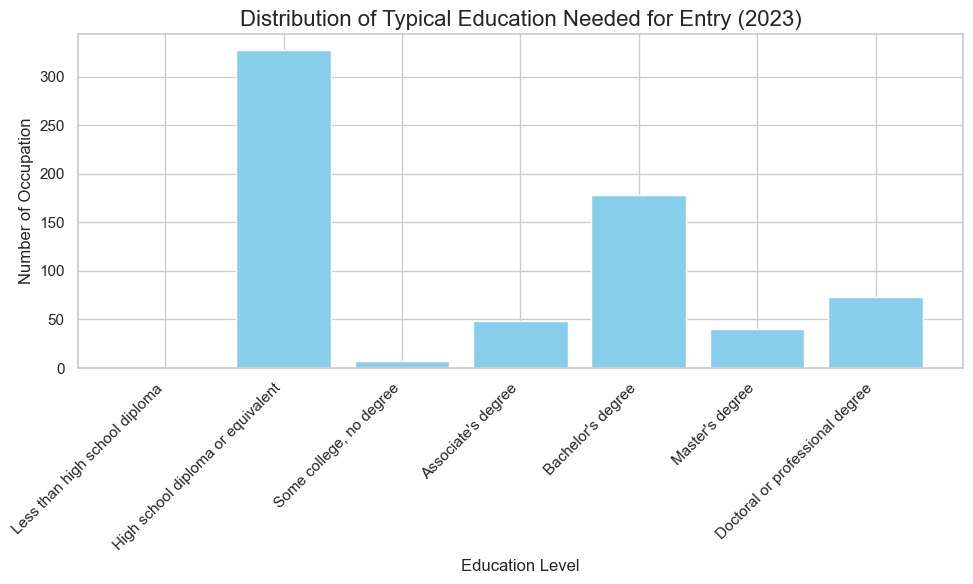

In [80]:
education_counts = education_counts.reindex(education_levels, fill_value=0)

# Plotting the distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Barplot for the education level distribution
plt.bar(education_counts.index, education_counts.values, color='skyblue')

# Title and labels
plt.title("Distribution of Typical Education Needed for Entry (2023)", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Number of Occupation", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

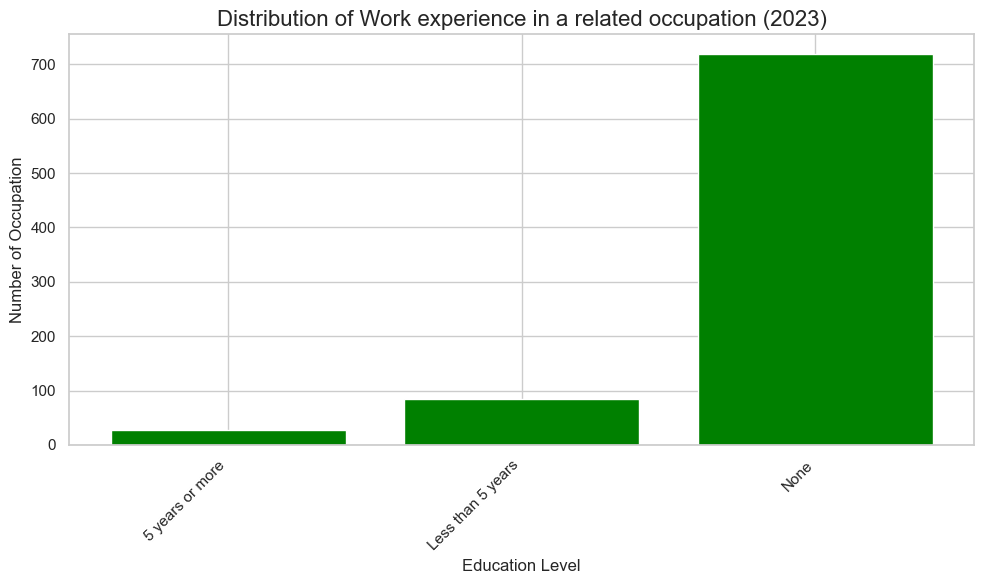

In [ ]:
work_exp = ['5 years or more',
            'Less than 5 years',
            'None']

work_counts = df_table_5_4['Work experience in a related occupation'].value_counts()

workexp_counts = education_counts.reindex(work_exp, fill_value=0)

# Plotting the distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Barplot for the education level distribution
plt.bar(workexp_counts.index, workexp_counts.values, color='green')

# Title and labels
plt.title("Distribution of Typical Education Needed for Entry (2023)", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Number of Occupation", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

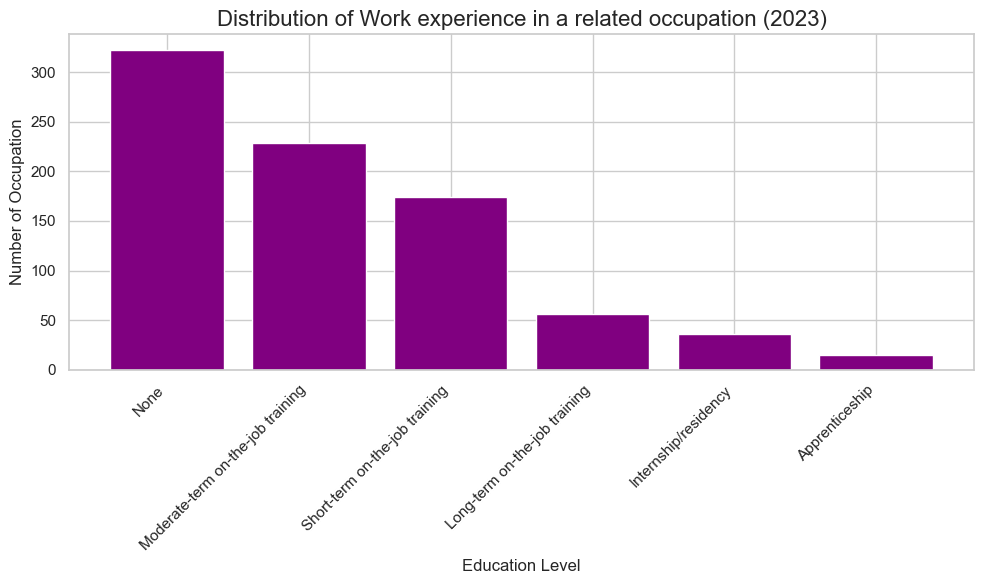

In [86]:
taining_levels = ['None',
            'Moderate-term on-the-job training',
            'Short-term on-the-job training',
            'Long-term on-the-job training',
            'Internship/residency',
            'Apprenticeship']

train_c = df_table_5_4['Typical on-the-job training needed to attain competency in the occupation'].value_counts()

training_counts = train_c.reindex(taining_levels, fill_value=0)

# Plotting the distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Barplot for the education level distribution
plt.bar(training_counts.index, training_counts.values, color='purple')

# Title and labels
plt.title("Distribution of Work experience in a related occupation (2023)", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Number of Occupation", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()